<a href="https://colab.research.google.com/github/hishaam19/RockID/blob/TrainingModelsAlex/XceptionAlex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/Datasets/geomstonesExtra.zip'



Archive:  /content/drive/MyDrive/Datasets/geomstonesExtra.zip
replace geomstonesExtra/test/Alexandrite/Alexandrite__100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:


import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
from keras import layers
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,regularization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import regularizers
import seaborn as sns
print(tf. __version__)

2.12.0


In [7]:

img_width=224
img_height=224
batch_size=32
num_of_classes=17

TRAIN_DIR= "/content/geomstonesExtra/train"
TEST_DIR= "/content/geomstonesExtra/test"
VAL_DIR = "/content/geomstonesExtra/val"

In [8]:
#preprocessing datasets
train_data = ImageDataGenerator(
                                    #rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=False,

                                    vertical_flip=False  )


#val_data = ImageDataGenerator(horizontal_flip=False)
#test_data = ImageDataGenerator(horizontal_flip=False)

train_gen = train_data.flow_from_directory(TRAIN_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))





"""val_gen = val_data.flow_from_directory(VAL_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width)
                                                            )
test_gen = test_data.flow_from_directory(TEST_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width)
                                                            )"""

val_gen=tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)
test_gen=tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)



Found 7143 images belonging to 74 classes.
Found 2024 files belonging to 74 classes.
Found 1090 files belonging to 74 classes.


In [13]:
model=Sequential()
pretrained_model=tf.keras.applications.Xception(include_top=False,
              weights='imagenet',
              input_shape=(img_height,img_width,3),pooling='max')
for layer in pretrained_model.layers:
  layer.trainable = True


#model.add(Dense(512,bias_regularizer='l1_l2',kernel_regularizer='l1_l2',activity_regularizer='l1_l2',activation='relu'))
model.add(pretrained_model)
#model.add(BatchNormalization())
#model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(74, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.001),
      loss='categorical_crossentropy',
      metrics =['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense_3 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 74)                37962     
                                                                 
Total params: 23,522,418
Trainable params: 23,467,890


In [36]:
ModelCallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]

history = model.fit(train_gen,epochs=100,verbose=1,validation_data=val_gen)

Epoch 1/100
224/224 [==============================] - ETA: 0s - loss: 0.4619 - accuracy: 0.9481

NotFoundError: ignored

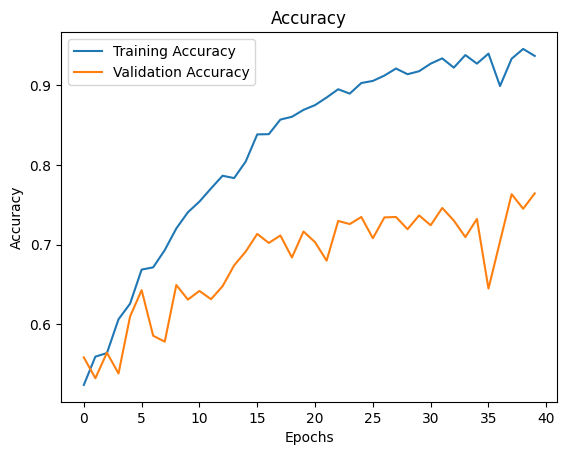

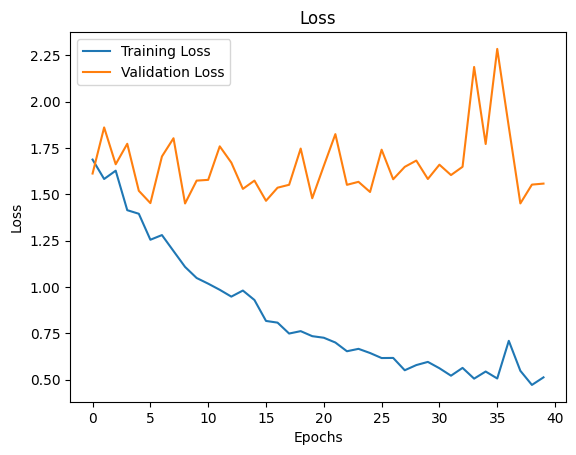

In [26]:


#Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluate test data
35/35 [==============================] - 5s 140ms/step - loss: 1.5581 - accuracy: 0.7651
Test Loss: 1.5580612421035767
Test Accuracy: 0.7651376128196716


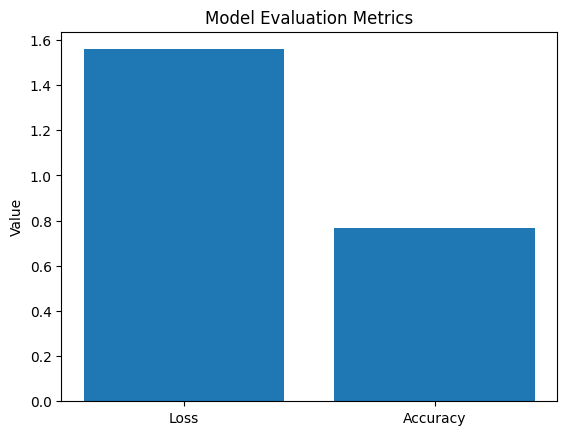

In [27]:
print("Evaluate test data")
#Save model
#tf.keras.saving.save_model("/content/sample_data/")


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_gen)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Plot the evaluation metrics
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_accuracy]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix

model.save('/content/drive/MyDrive/gem76%1.h5')
# Compute the confusion matrix

"""num_classes = val_gen.num_classes
y_train_true = val_gen.classes
y_train_pred_probs = model.predict(val_gen)
y_train_pred_classes = np.argmax(y_train_pred_probs, axis=1)

train_cm = confusion_matrix(y_train_true, y_train_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()"""

'num_classes = val_gen.num_classes\ny_train_true = val_gen.classes\ny_train_pred_probs = model.predict(val_gen)\ny_train_pred_classes = np.argmax(y_train_pred_probs, axis=1)\n\ntrain_cm = confusion_matrix(y_train_true, y_train_pred_classes)\n\n# Plot the confusion matrix as a heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)\nplt.title("Validation Confusion Matrix")\nplt.xlabel("Predicted Labels")\nplt.ylabel("True Labels")\nplt.show()'

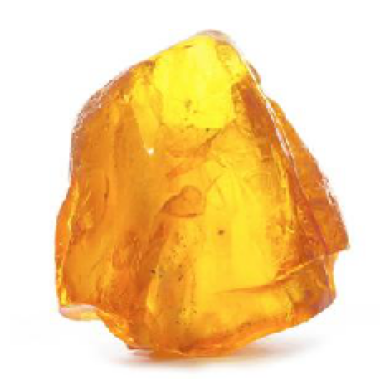

1/1 [==============================] - 0s 36ms/step
[[9.03409595e-27 9.12115910e-14 1.33887303e-23 9.95292664e-01
  2.14814395e-20 3.31049262e-17 2.40603229e-16 1.39896444e-14
  4.37262364e-26 3.34596212e-19 4.89323684e-05 6.72709501e-15
  1.21009869e-09 3.11769222e-11 1.33287708e-20 5.81620618e-09
  1.30218112e-18 1.93564650e-10 3.76100789e-10 8.76570274e-20
  1.10546544e-10 5.57552674e-04 2.01231572e-07 6.03697160e-13
  1.86195555e-13 2.11352885e-17 1.20833309e-11 1.94368807e-19
  4.85593653e-27 7.93585059e-11 9.62039224e-24 2.49506226e-13
  9.34555715e-07 8.15923272e-26 8.36644618e-16 1.85027362e-12
  2.41317859e-20 1.23545896e-09 1.31609557e-16 5.63606717e-09
  7.75663558e-25 3.00341009e-20 1.39576184e-09 3.93977521e-13
  3.66900114e-15 1.16276236e-16 1.41790851e-14 3.90811125e-12
  5.51118017e-17 1.05844187e-14 5.38842709e-16 6.41926778e-09
  2.68735782e-18 7.25691497e-19 2.34069542e-09 4.37477176e-13
  1.20304548e-12 1.33455570e-13 3.49139050e-03 1.43346966e-12
  1.35772330e-15 6

In [33]:
classes=['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst','Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green',
         'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Cats Eye',
         'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine',
         'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite',
         'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli',
         'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Opal', 'Pearl', 'Peridot',
         'Pyrite', 'Pyrope', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue',
         'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Serpentine', 'Sodalite', 'Spessartite',
         'Sphene', 'Spinel', 'Sunstone', 'Tanzanite', 'Tigers Eye', 'Topaz', 'Tourmaline', 'Tsavorite',
         'Turquoise', 'Variscite', 'Zircon', 'Zoisite']


label_dict = train_gen.class_indices
#print(label_dict)
img = tf.keras.preprocessing.image.load_img('/content/geomstonesExtra/test/Amber/Amber__22.jpg', target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
img_array = tf.expand_dims(img_array, axis=0)
#preprocessed_img = preprocess_input(img_array)
predictions = model.predict(img_array)
print(predictions)
max_index = np.argmax(predictions)
print("Maximum index:", max_index)
print("The model is predicting this rock as:",classes[max_index])